NumPy version: 1.26.0
pandas version: 1.5.3
TensorFlow version: 2.19.0
CSV Columns: ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Start of Block_Id', 'Start of Block_Name', 'Start of Block_Size', 'Start of Block_Type', 'Q1', 'Q2', 'Q3', 'Q3_5_TEXT', 'Q4', 'Q5', 'Q6', 'Q7', 'Q7_7_TEXT', 'Q8', 'Q9-1', 'Q9-1_13_TEXT', 'Q9-2', 'Q9-2_13_TEXT', 'Q9-3', 'Q10', 'Q11', 'Q12_1', 'Q12_2', 'Q12_3', 'Q13', 'Q13_9_TEXT', 'Q14', 'Q14_7_TEXT', 'Q15', 'Q15_7_TEXT', 'Q16', 'Q16_7_TEXT', 'Q17', 'Q18', 'Q18_5_TEXT', 'Q19_1', 'Q20', 'Q20_1_TEXT', 'Q21_1', 'Q21_2', 'Q22', 'Q22_13_TEXT', 'Q23', 'Q24', 'Q25', 'Q26_1', 'Q27', 'Q27_11_TEXT', 'Q28', 'Q29_1', 'Q29_2', 'Q29_3', 'Q30', 'Q30_12_TEXT', 'Q31', 'Q31_6_TEXT', 'Q32', 'Q33_1', 'Q33_2', 'Q34', 'Q34_9_TEXT', 'Q35', 'Q

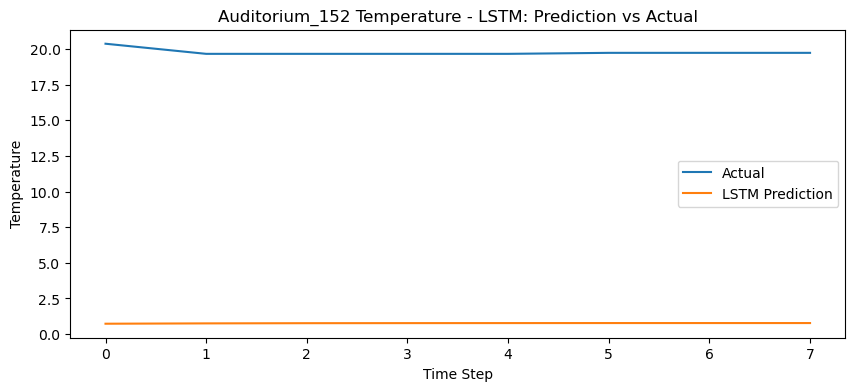

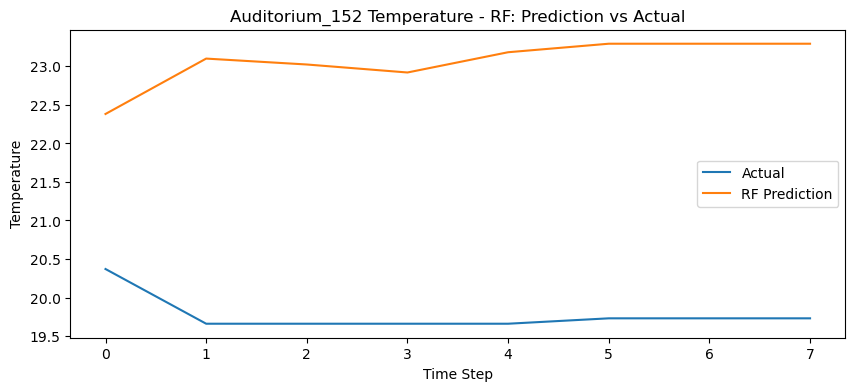


Processing Auditorium_152 - humidity
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Auditorium_152 - humidity (LSTM): MSE=3440.56, RMSE=58.66, R2=-143292.35
Auditorium_152 - humidity (RF): MSE=16.55, RMSE=4.07, R2=-688.47


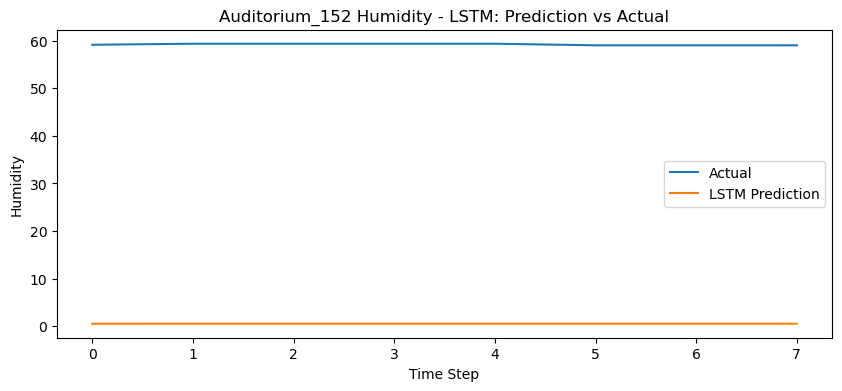

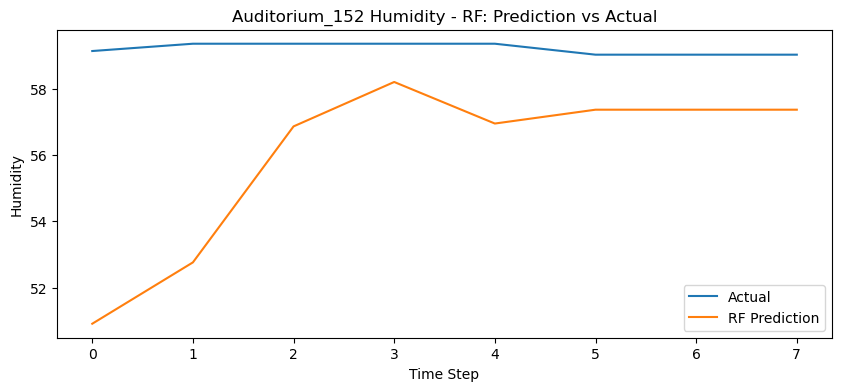


Processing Classroom_210 - temperature
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Classroom_210 - temperature (LSTM): MSE=379.02, RMSE=19.47, R2=-8405.68
Classroom_210 - temperature (RF): MSE=4.88, RMSE=2.21, R2=-107.29


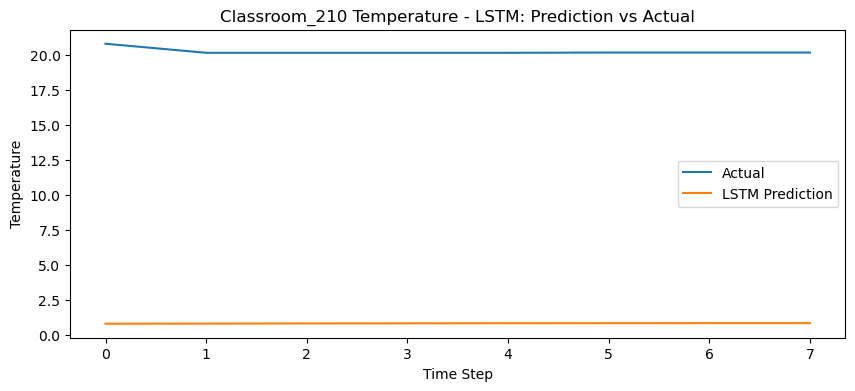

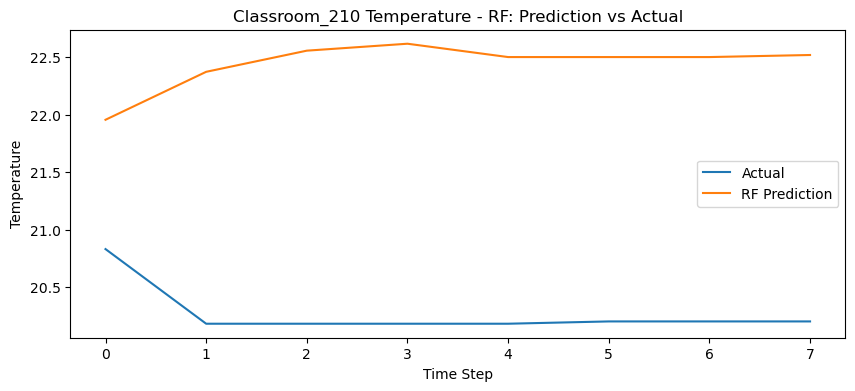


Processing Classroom_210 - humidity
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Classroom_210 - humidity (LSTM): MSE=3462.88, RMSE=58.85, R2=-533.15
Classroom_210 - humidity (RF): MSE=26.62, RMSE=5.16, R2=-3.11


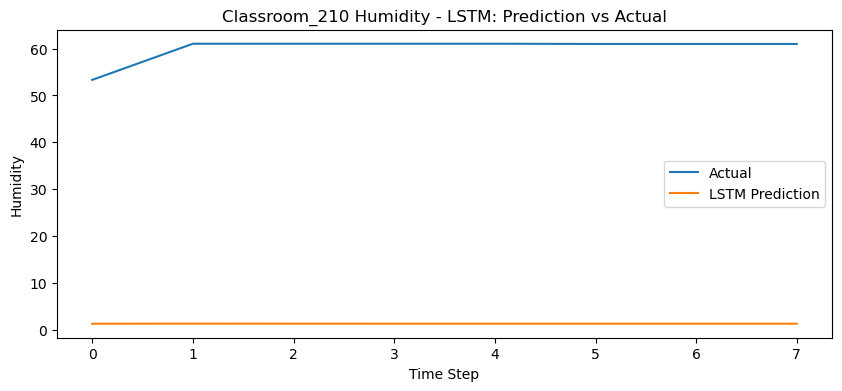

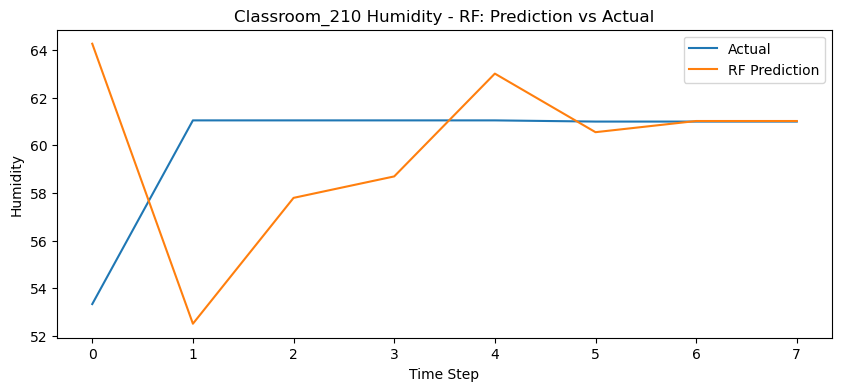


Processing Classroom_230 - temperature
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Classroom_230 - temperature (LSTM): MSE=409.45, RMSE=20.23, R2=-2579.86
Classroom_230 - temperature (RF): MSE=1.35, RMSE=1.16, R2=-7.52


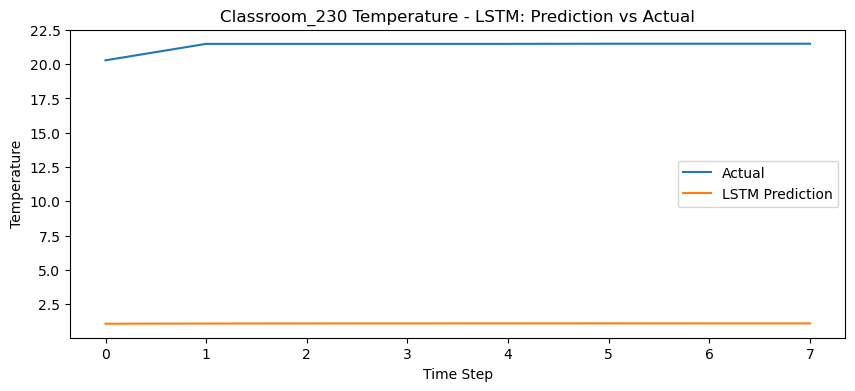

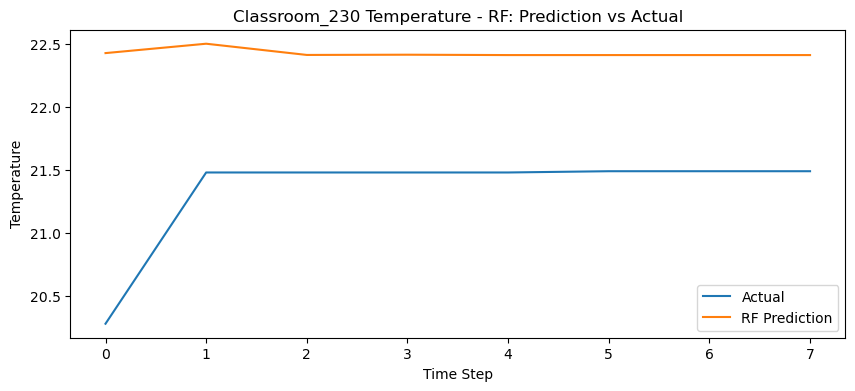


Processing Classroom_230 - humidity
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Classroom_230 - humidity (LSTM): MSE=3297.21, RMSE=57.42, R2=-10553.65
Classroom_230 - humidity (RF): MSE=6.40, RMSE=2.53, R2=-19.49


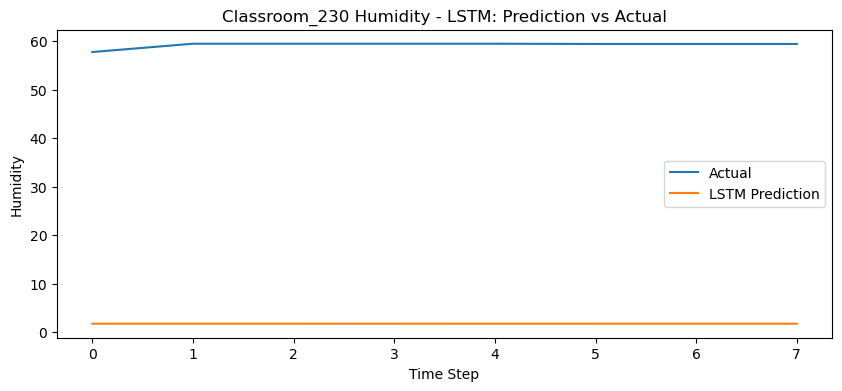

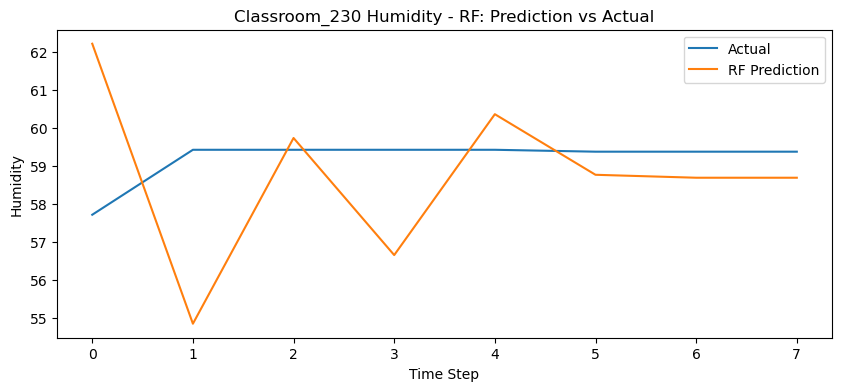


Summary of Model Performance:
Auditorium_152 - temperature:
  LSTM -> MSE: 361.38, RMSE: 19.01, R2: -6999.09
  RF   -> MSE: 11.04, RMSE: 3.32, R2: -212.94
Auditorium_152 - humidity:
  LSTM -> MSE: 3440.56, RMSE: 58.66, R2: -143292.35
  RF   -> MSE: 16.55, RMSE: 4.07, R2: -688.47
Classroom_210 - temperature:
  LSTM -> MSE: 379.02, RMSE: 19.47, R2: -8405.68
  RF   -> MSE: 4.88, RMSE: 2.21, R2: -107.29
Classroom_210 - humidity:
  LSTM -> MSE: 3462.88, RMSE: 58.85, R2: -533.15
  RF   -> MSE: 26.62, RMSE: 5.16, R2: -3.11
Classroom_230 - temperature:
  LSTM -> MSE: 409.45, RMSE: 20.23, R2: -2579.86
  RF   -> MSE: 1.35, RMSE: 1.16, R2: -7.52
Classroom_230 - humidity:
  LSTM -> MSE: 3297.21, RMSE: 57.42, R2: -10553.65
  RF   -> MSE: 6.40, RMSE: 2.53, R2: -19.49


In [1]:
# ========================================================
# (If needed, run these package installation commands in a separate cell)
# !pip uninstall -y numpy pandas tensorflow pyarrow
# !pip install numpy==1.26.0 pandas==1.5.3 tensorflow==2.19.0 pyarrow==13.0.0 scikit-learn matplotlib
# ========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set font to a common English font with good Unicode support (DejaVu Sans)
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

# Version check
print("NumPy version:", np.__version__)         # 1.26.0
print("pandas version:", pd.__version__)         # 1.5.3
print("TensorFlow version:", tf.__version__)     # 2.19.0

# ---------------------------
# Load CSV file and preprocessing
# ---------------------------
# Set the CSV file path (modify if needed)
data_path = r"/Users/JiMinPark/Desktop/Data Preprocessing/merged_20240906-20241114.csv"

# Read the header to check column names
temp_df = pd.read_csv(data_path, nrows=0)
print("CSV Columns:", temp_df.columns.tolist())

# Select the date column: we use 'timestamp' (since 'dtm' is not present)
date_col = 'timestamp' if 'timestamp' in temp_df.columns else None

if date_col:
    df = pd.read_csv(data_path, parse_dates=[date_col])
    df = df.sort_values(date_col).reset_index(drop=True)
    print(f"Sorted by date column '{date_col}'.")
else:
    print("No date column found; loading CSV without sorting.")
    df = pd.read_csv(data_path)

print("Data shape:", df.shape)
print("Final Columns:", df.columns.tolist())

# ---------------------------
# Define room information and target columns for Temperature and Humidity
# ---------------------------
rooms = {
    "Auditorium_152": {
         "temperature": "Auditorium_152_temperature, °C",
         "humidity": "Auditorium_152_humidity, %"
    },
    "Classroom_210": {
         "temperature": "Classroom_210_temperature, °C",
         "humidity": "Classroom_210_humidity, %"
    },
    "Classroom_230": {
         "temperature": "Classroom_230_temperature, °C",
         "humidity": "Classroom_230_humidity, %"
    }
}

# ---------------------------
# Define a function to create univariate time series dataset using a sliding window
# ---------------------------
def make_univariate_dataset(series, window_size=5):
    """
    Given a 1D array 'series', create a dataset for time series forecasting.
    Each sample is a window of 'window_size' consecutive values and the target is the immediate next value.
    Returns: X (samples x window_size), y (samples,)
    """
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i : i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

window_size = 5  # You may adjust the window size if needed

# ---------------------------
# Loop through each room and each target measure (Temperature and Humidity)
# ---------------------------
results = {}  # To store performance metrics

for room, measures in rooms.items():
    results[room] = {}
    for measure, target_col in measures.items():
        print(f"\nProcessing {room} - {measure}")
        # Check if the target column exists in the DataFrame
        if target_col not in df.columns:
            print(f"Column {target_col} not found in the CSV for {room} - {measure}. Skipping.")
            continue
        
        # Extract the target series as univariate data (convert to float32)
        series = df[target_col].astype(np.float32).values
        
        # Create dataset using the sliding window method
        X, y = make_univariate_dataset(series, window_size)
        if len(X) < 2:
            print(f"Not enough data points for {room} - {measure} with the current window size.")
            continue
        
        # Split the dataset into train and test (80/20 split)
        split_idx = int(0.8 * len(X))
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        
        # ---------------------------
        # LSTM Model (Univariate forecasting)
        # ---------------------------
        # For LSTM, reshape input to (samples, window_size, 1)
        X_train_lstm = X_train.reshape(-1, window_size, 1)
        X_test_lstm = X_test.reshape(-1, window_size, 1)
        
        model_lstm = Sequential()
        model_lstm.add(tf.keras.Input(shape=(window_size, 1)))
        model_lstm.add(LSTM(units=32, activation='tanh'))
        model_lstm.add(Dense(16, activation='relu'))
        model_lstm.add(Dense(1, activation='linear'))
        model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
        
        history = model_lstm.fit(X_train_lstm, y_train, validation_data=(X_test_lstm, y_test),
                                 epochs=20, batch_size=32, verbose=0)
        
        y_pred_lstm = model_lstm.predict(X_test_lstm)
        mse_lstm = mean_squared_error(y_test, y_pred_lstm)
        rmse_lstm = np.sqrt(mse_lstm)
        r2_lstm = r2_score(y_test, y_pred_lstm)
        
        # ---------------------------
        # Random Forest Model (Univariate forecasting)
        # ---------------------------
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        mse_rf = mean_squared_error(y_test, y_pred_rf)
        rmse_rf = np.sqrt(mse_rf)
        r2_rf = r2_score(y_test, y_pred_rf)
        
        results[room][measure] = {
            "LSTM": {"MSE": mse_lstm, "RMSE": rmse_lstm, "R2": r2_lstm},
            "RF": {"MSE": mse_rf, "RMSE": rmse_rf, "R2": r2_rf}
        }
        
        print(f"{room} - {measure} (LSTM): MSE={mse_lstm:.2f}, RMSE={rmse_lstm:.2f}, R2={r2_lstm:.2f}")
        print(f"{room} - {measure} (RF): MSE={mse_rf:.2f}, RMSE={rmse_rf:.2f}, R2={r2_rf:.2f}")
        
        # ---------------------------
        # Plot LSTM Predictions vs Actual
        # ---------------------------
        plt.figure(figsize=(10,4))
        plt.plot(y_test, label="Actual")
        plt.plot(y_pred_lstm, label="LSTM Prediction")
        plt.title(f"{room} {measure.capitalize()} - LSTM: Prediction vs Actual")
        plt.xlabel("Time Step")
        plt.ylabel(measure.capitalize())
        plt.legend()
        plt.show()
        
        # ---------------------------
        # Plot Random Forest Predictions vs Actual
        # ---------------------------
        plt.figure(figsize=(10,4))
        plt.plot(y_test, label="Actual")
        plt.plot(y_pred_rf, label="RF Prediction")
        plt.title(f"{room} {measure.capitalize()} - RF: Prediction vs Actual")
        plt.xlabel("Time Step")
        plt.ylabel(measure.capitalize())
        plt.legend()
        plt.show()

# (Optional) Print summary of results
print("\nSummary of Model Performance:")
for room, measures in results.items():
    for measure, metrics in measures.items():
        print(f"{room} - {measure}:")
        print("  LSTM -> MSE: {:.2f}, RMSE: {:.2f}, R2: {:.2f}".format(metrics["LSTM"]["MSE"],
                                                                        metrics["LSTM"]["RMSE"],
                                                                        metrics["LSTM"]["R2"]))
        print("  RF   -> MSE: {:.2f}, RMSE: {:.2f}, R2: {:.2f}".format(metrics["RF"]["MSE"],
                                                                        metrics["RF"]["RMSE"],
                                                                        metrics["RF"]["R2"]))